In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1.Check for missing values

In [42]:
# 1.Check for missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


this shows that there are no missing values in the dataset , so it can be used for analysis

# 2. Factors contributing to employ turnover

1.Heatmap 2.DistributionPlot 3.BarPlot

# 2.1 (heatmap)

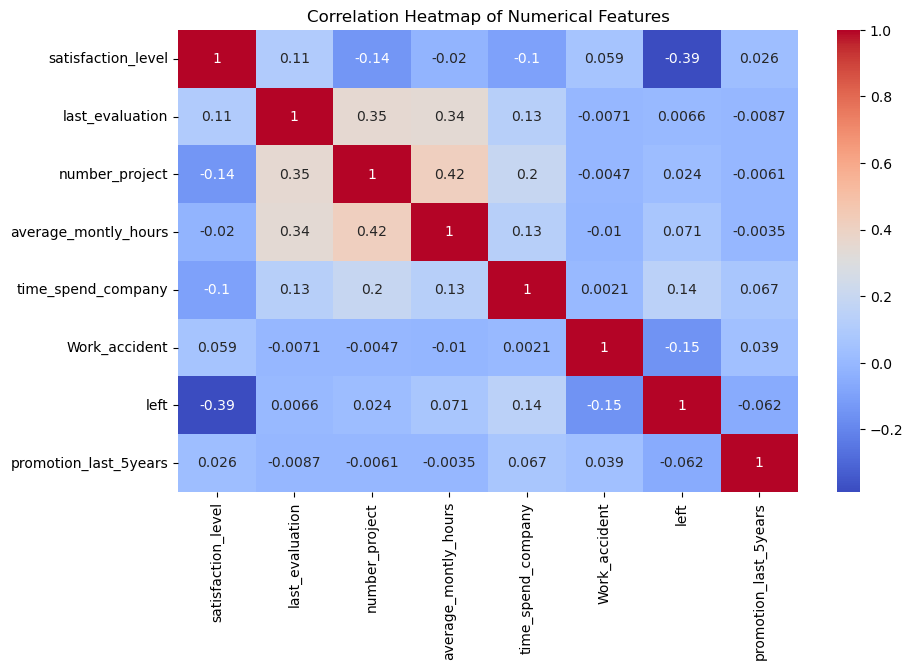

In [44]:
# 2.1 (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 2.2 (distribution plot)
1.Employee Satisfaction 
2.Employee Evalution
3.Employee avg monthly hours

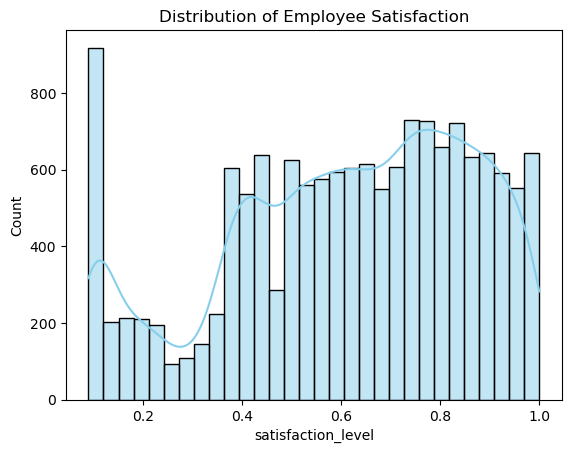

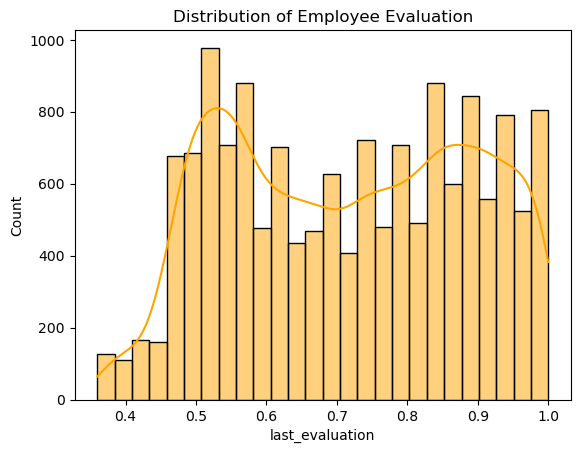

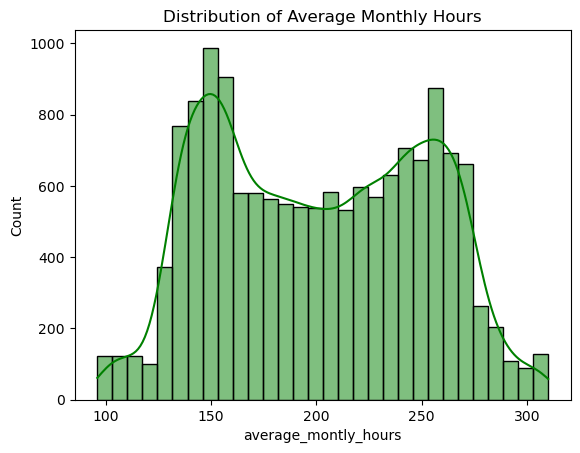

In [15]:
# Distribution of Employee Satisfaction
sns.histplot(data=df, x='satisfaction_level', kde=True, color='skyblue')
plt.title('Distribution of Employee Satisfaction')
plt.show()

# Distribution of Last Evaluation
sns.histplot(data=df, x='last_evaluation', kde=True, color='orange')
plt.title('Distribution of Employee Evaluation')
plt.show()

# Distribution of Average Monthly Hours
sns.histplot(data=df, x='average_montly_hours', kde=True, color='green')
plt.title('Distribution of Average Monthly Hours')
plt.show()


# 2.3 (Bar Plot)

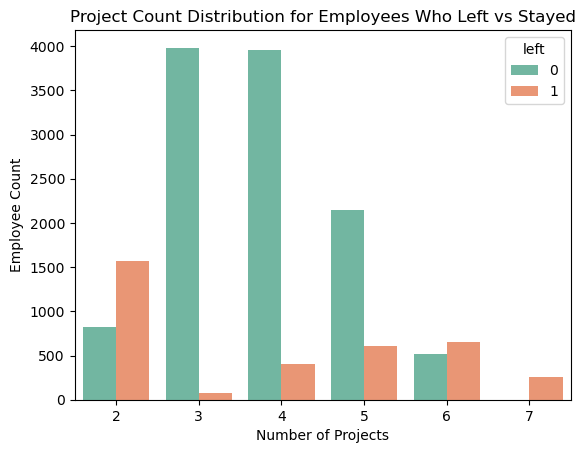

In [46]:
sns.countplot(data=df, x='number_project', hue='left', palette='Set2')
plt.title('Project Count Distribution for Employees Who Left vs Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Employee Count')
plt.show()


Employees with very few or very many projects are more likely to leave.
The lowest turnover tends to occur among employees with a moderate workload.

# 3.Clustering

# 3.1 Filter Required Data

In [6]:
# Filter only employees who left the company
df_left = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]
df_left.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


# 3.2 K-Means Clustering into 3 Groups

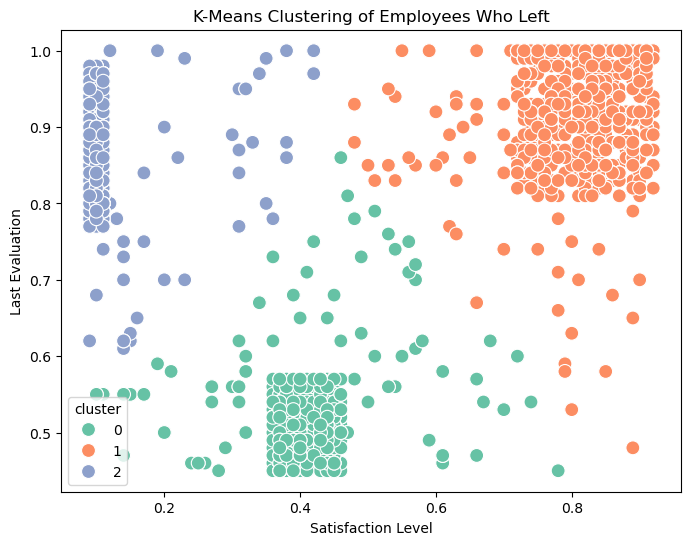

In [18]:
from sklearn.cluster import KMeans

# KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_left['cluster'] = kmeans.fit_predict(df_left[['satisfaction_level', 'last_evaluation']])

# Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_left, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set2', s=100)
plt.title('K-Means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


# 3.3 Interpretation of Employee Cluster:


There are 3 clusters:
ORANGE:Satisfied and high-performing employees left. Indicates potential issues like lack of advancement opportunities, better offers outside, or organizational misalignment.
GREEN:These employees were moderately satisfied but still left. Possibly due to lack of career growth or external factors.
BLUE:Classic case of high performers under high pressure with low satisfaction. Likely left due to burnout, stress, or feeling undervalued.

# 4.1 Preprocessing Categorical Variables

1.Seperating categorical and numeric variables
2.Applying get_dummies() to categorical variables
3.Combining categorical and numeric variables

In [23]:
# Separate variables
X = df.drop('left', axis=1)
y = df['left']

# Identify categorical columns (salary, sales/department in your dataset)
categorical_cols = ['salary', 'sales']  # Adjust if 'Department' is used instead of 'sales'

# One-hot encode categorical variables
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)

# Select numeric columns
X_numeric = X.drop(columns=categorical_cols)

# Combine encoded categorical and numeric features
X_processed = pd.concat([X_numeric, X_categorical], axis=1)

X_processed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,True,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,True,False,False,False,False,False,False,False,True,False,False


# 4.2 Stratified Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Split the data with stratification 
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=123, stratify=y
)

print("Class distribution in training set:\n", y_train.value_counts())
print("Class distribution in test set:\n", y_test.value_counts())


Class distribution in training set:
 left
0    9142
1    2857
Name: count, dtype: int64
Class distribution in test set:
 left
0    2286
1     714
Name: count, dtype: int64


# 4.3 Apply SMOTE for Upsampling

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)

# SMOTE on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Class distribution after SMOTE:
 left
0    9142
1    9142
Name: count, dtype: int64


# 5-Fold Cross-Validation & Model Evaluation
1.Logistic Regression
2.Random Forest Classifier
3.Gradient Boosting Classifier



In [32]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings('ignore')  # Suppress warnings for clean output

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

def plot_classification_report(y_true, y_pred, title='Classification Report'):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().iloc[:-1, :-1]  # Remove support column for cleaner plot

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f')
    plt.title(title)
    plt.show()

# 5.1 Logistic Regression

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



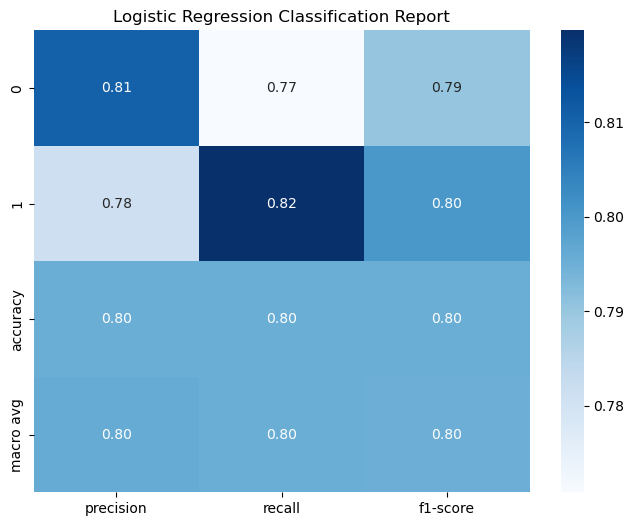

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

# Cross-validated predictions
y_pred_lr = cross_val_predict(log_reg, X_train_smote, y_train_smote, cv=cv)

# Classification report
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_train_smote, y_pred_lr))

plot_classification_report(y_train_smote, y_pred_lr, title='Logistic Regression Classification Report')


# 5.2 Random Forest Classifier

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.99      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.99      0.98      0.98     18284
weighted avg       0.99      0.98      0.98     18284



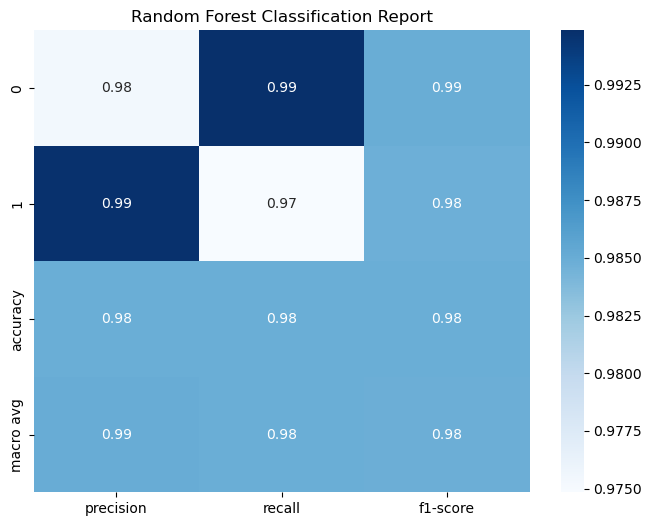

In [50]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=123)

# Cross-validated predictions
y_pred_rf = cross_val_predict(rf, X_train_smote, y_train_smote, cv=cv)

# Classification report
print("=== Random Forest Classification Report ===")
print(classification_report(y_train_smote, y_pred_rf))

plot_classification_report(y_train_smote, y_pred_rf, title='Random Forest Classification Report')


# 5.3 Gradient Boosting Classifier

=== Gradient Boosting Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



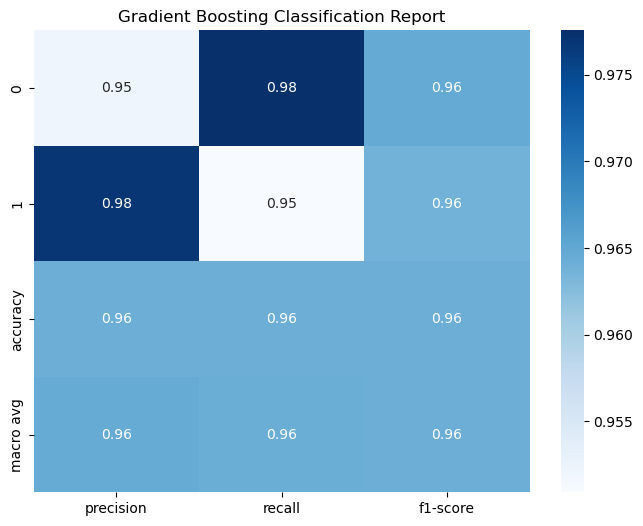

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=123)

# Cross-validated predictions
y_pred_gb = cross_val_predict(gb, X_train_smote, y_train_smote, cv=cv)

# Classification report
print("=== Gradient Boosting Classification Report ===")
print(classification_report(y_train_smote, y_pred_gb))

plot_classification_report(y_train_smote, y_pred_gb, title='Gradient Boosting Classification Report')


# 6.Identify Best Model
1.Calculating and Plotting ROC Curve and AUC for each model
2.Confusion Matrix heatmaps
3.Recall or Precision

# 6.1 ROC Curve & AUC for All Models

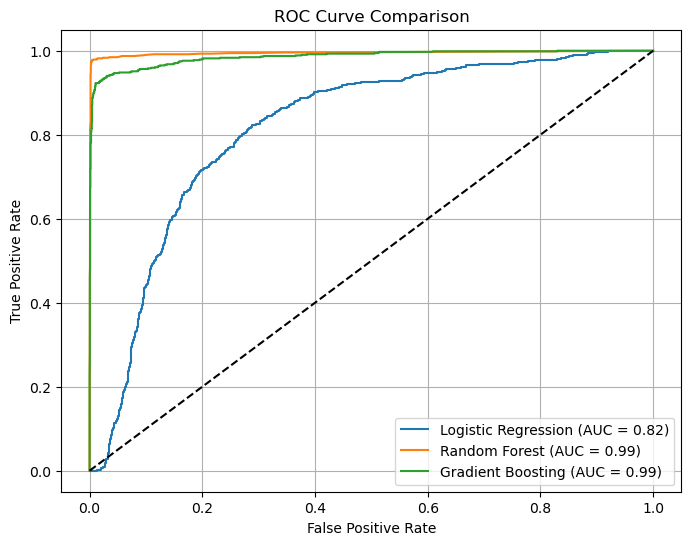

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

log_reg.fit(X_train_smote, y_train_smote)
rf.fit(X_train_smote, y_train_smote)
gb.fit(X_train_smote, y_train_smote)


y_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_gb = gb.predict_proba(X_test)[:,1]

# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

# AUC Scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_gb = roc_auc_score(y_test, y_prob_gb)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


# 6.2 Confusion Matrix for Each Model

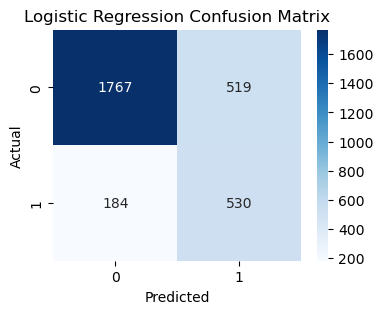

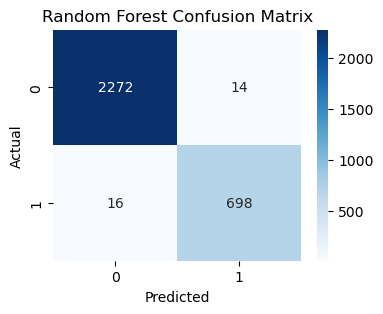

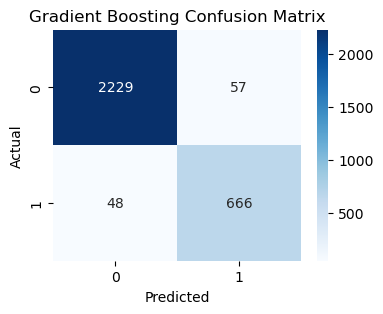

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
y_pred_test_lr = log_reg.predict(X_test)
y_pred_test_rf = rf.predict(X_test)
y_pred_test_gb = gb.predict(X_test)

# confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for each model
plot_conf_matrix(y_test, y_pred_test_lr, 'Logistic Regression Confusion Matrix')
plot_conf_matrix(y_test, y_pred_test_rf, 'Random Forest Confusion Matrix')
plot_conf_matrix(y_test, y_pred_test_gb, 'Gradient Boosting Confusion Matrix')


# 6.3 Metric to Focus: Precision or Recall

Recall should be used beacause missing an employee who is about to leave (False Negative) is more costly than mistakenly flagging someone who stays.
Proactively identifying potential leavers allows early intervention

# 7.Risk Zone Categorization & Retention Strategies

1.Pedict turnover probability 2.Retention

# 7.1 Predict Turnover Probability on Test Data

In [62]:
# Gradient Boosting model 

# Predicting the probability of turnover for each employee
y_prob_test = gb.predict_proba(X_test)[:, 1]  # Probability of class '1' (leaving)

# Creating a dataframe with probabilities and actual labels
risk_df = X_test.copy()
risk_df['Turnover_Probability'] = y_prob_test
risk_df['Actual_Left'] = y_test.values

# Viewing the results
risk_df[['Turnover_Probability', 'Actual_Left']].head(10)


,Turnover_Probability,Actual_Left
10627,0.006257,0
2703,0.949465,0
6059,0.092119,0
3258,0.016705,0
4565,0.027535,0
4991,0.005267,0
13976,0.006449,0
9427,0.009274,0
7173,0.007762,0
13412,0.041753,0


# 7.2 Categorization

In [72]:
def categorize_risk(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Apply categorization
risk_df['Risk_Zone'] = risk_df['Turnover_Probability'].apply(categorize_risk)

# View distribution
risk_df['Risk_Zone'].value_counts()



Risk_Zone
Safe Zone (Green)            2088
High-Risk Zone (Red)          617
Low-Risk Zone (Yellow)        214
Medium-Risk Zone (Orange)      81
Name: count, dtype: int64

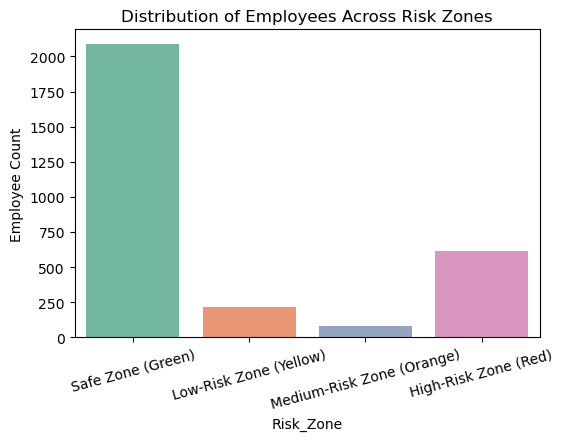

In [66]:

plt.figure(figsize=(6,4))
sns.countplot(data=risk_df, x='Risk_Zone', order=['Safe Zone (Green)', 'Low-Risk Zone (Yellow)', 'Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)'], palette='Set2')
plt.title('Distribution of Employees Across Risk Zones')
plt.ylabel('Employee Count')
plt.xticks(rotation=15)
plt.show()


# 7.3  Retention 
Safe Zone (Green) :Continue current engagement efforts; monitor satisfaction.
Low-Risk Zone (Yellow) :	Improve recognition programs, increase communication, career talks.
Medium-Risk Zone (Orange) :	Address workload, offer personalized development plans, close supervision.
High-Risk Zone (Red) :	Immediate intervention: Retention bonuses, focused feedback, executive attention.